## Data Overview
The data was downloaded from IBM Sample Data Sets for customer retention programs. The goal of this project is to predict behaviors of churn or not churn to help retain customers. 
Each row represents a customer, each column contains a customer’s attribute.

Customers who left within the last month – the column is called Churn  
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies   
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges  
Demographic info about customers – gender, age range, and if they have partners and dependents  

### Loading packages and libraries 

In [74]:
options(warn = -1)

# define used libraries
libraries_used <- 
  c("lazyeval", "readr","plyr" ,"dplyr", "readxl", "ggplot2", 
    "funModeling", "scales", "tidyverse", "corrplot", "GGally", "caret",
    "rpart", "randomForest", "pROC", "gbm", "choroplethr", "choroplethrMaps",
    "microbenchmark", "doParallel", "e1071", "rms", "MASS", "e1071" , "ROCR", "gplots", "rpart", "ggpubr","rpart.plot", "Boruta")

# check missing libraries
libraries_missing <- 
  libraries_used[!(libraries_used %in% installed.packages()[,"Package"])]
# install missing libraries
if(length(libraries_missing)) install.packages(libraries_missing)

library(readr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(corrplot)
library(caret)
library(rms)
library(MASS)
library(e1071)
library(ROCR)
library(gplots)
library(pROC)
library(rpart)
library(randomForest)
library(ggpubr)
library(rpart.plot)
library(Boruta)

also installing the dependency 'ranger'



package 'ranger' successfully unpacked and MD5 sums checked
package 'Boruta' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aditya Goel\AppData\Local\Temp\Rtmps3Kw1w\downloaded_packages


### Explore Data

In [2]:
setwd("D:/Folders/R/Decision Tree")

In [3]:
telco <- read.csv("Telco client.csv", na = "", stringsAsFactors =FALSE)
telco
telco <- data.frame(telco)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
str(telco)
summary(telco)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

  customerID           gender          SeniorCitizen      Partner         
 Length:7043        Length:7043        Min.   :0.0000   Length:7043       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1621                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
                                                                          
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7043        Min.   : 0.00   Length:7043        Length:7043       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.37                                        
                    3rd Qu.:55

#### Missing Value Treatment
Based on the summary, there are 11 missing values in the TotalCharges column, which account for only 0.16% of the total 
number of observations. So I remove those 11 rows with missing values. 

In [5]:
telco <- telco[complete.cases(telco),] 


#### Continuous Variables
For continuous variables, let's check for distributions.

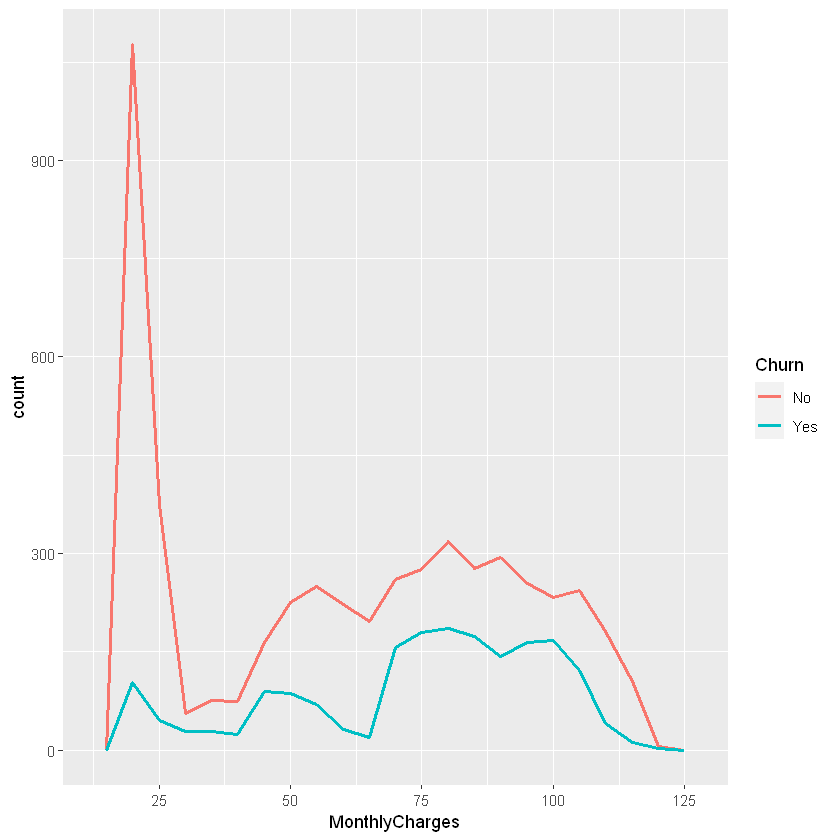

In [6]:
ggplot(data = telco, aes(MonthlyCharges, color = Churn))+
  geom_freqpoly(binwidth = 5, size = 1)


The number of current customers with MonthlyCharges below 25 dollars is extremly high. For the customers with Monthlycharges greater than $30, 
the distributions are similar between who churned and who did not churn.

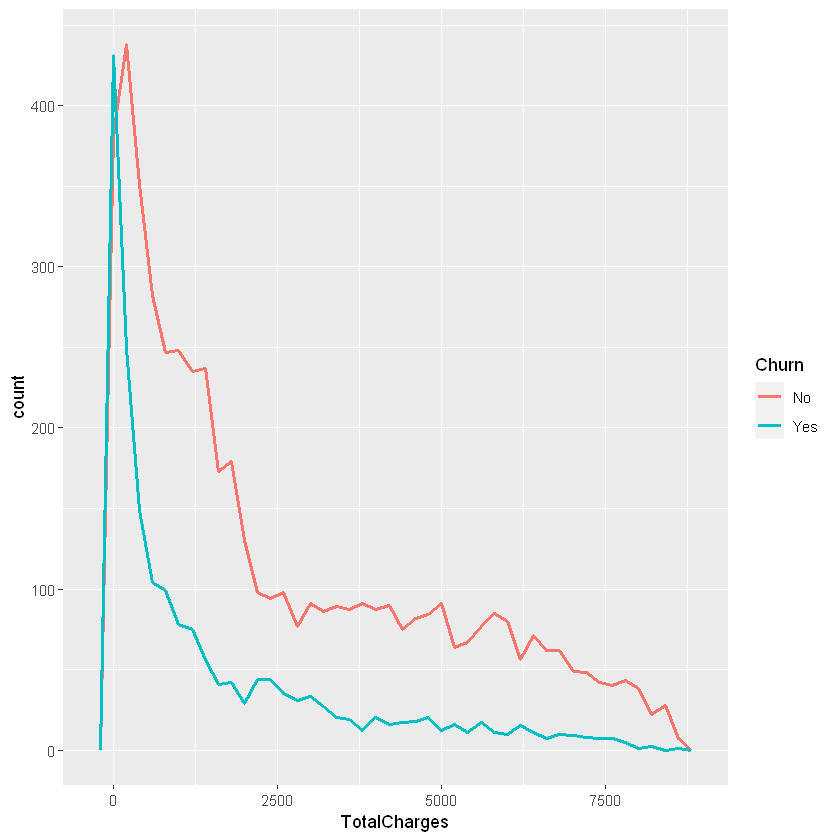

In [7]:
ggplot(data = telco, aes(TotalCharges, color = Churn))+
  geom_freqpoly(binwidth = 200, size = 1)

The distribution of TotalCharges is highly positive skew for all customers no matter whether they churned or not. 

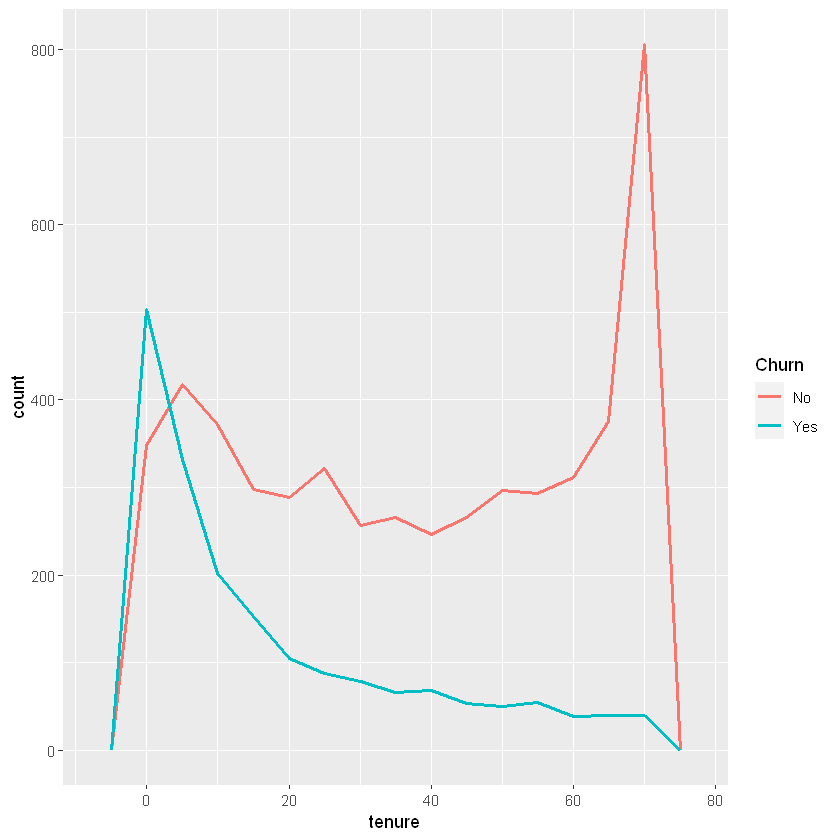

In [8]:
ggplot(data = telco, aes(tenure, colour = Churn))+
  geom_freqpoly(binwidth = 5, size = 1)


The distributions for tenure are very different between customers who churned and who didn't churn. For customers
who churned, the distribution is positve skew, which means customers who churned are more likely to cancel the service 
in the first couple of months. For current customers who didn't churn, there are two spikes. The second spike is much more
drastic than the first one, which means a large group of current customers have been using the service more than 5 years.

No obvious outliers for 3 numeric variables. Then let's check for correlations.

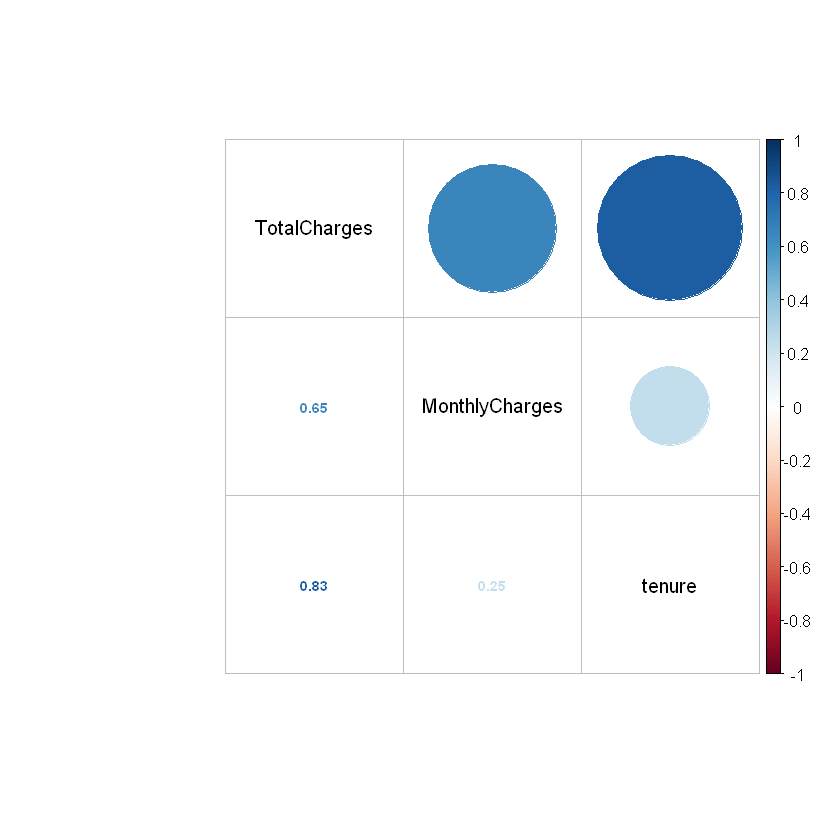

In [9]:
telco %>%
  dplyr::select (TotalCharges, MonthlyCharges, tenure) %>%
  cor() %>%
  corrplot.mixed(upper = "circle", tl.col = "black", number.cex = 0.7)



The plot shows high correlations between Totalcharges & tenure and between TotalCharges & MonthlyCharges. 
Pay attention to these variables while training models later. Multicollinearity does not 
reduce the predictive power or reliability of the model as a whole, at least within the sample data set. 
But it affects calculations regarding individual predictors.

The tenure represents time period in months. To better find patterns with time, I change it to a factor with 5 
levels, with each level represents a bin of tenure in years. 

In [10]:
telco <- telco %>%
  mutate(tenure_year = case_when(tenure <= 12 ~ "0-1 year",
                                 tenure > 12 & tenure <= 24 ~ "1-2 years",
                                 tenure > 24 & tenure <= 36 ~ "2-3 years",
                                 tenure > 36 & tenure <= 48 ~ "3-4 years",
                                 tenure > 48 & tenure <= 60 ~ "4-5 years",
                                 tenure > 60 & tenure <= 72 ~ "5-6 years"))
telco$tenure <-NULL
table(telco$tenure_year)


 0-1 year 1-2 years 2-3 years 3-4 years 4-5 years 5-6 years 
     2175      1024       832       762       832      1407 

#### Categorical Variables
I found that there is a column called Phone Service. And in the MultipleLines, some rows have the value of "No Phone Service".
Are they related?

In [11]:
table(telco[, c("PhoneService","MultipleLines")])


            MultipleLines
PhoneService   No No phone service  Yes
         No     0              680    0
         Yes 3385                0 2967


When the value of Phone Service is "No", the value of Multiplelines shows "No Phone Service." The"No Phone Service" 
value in the Multiplelines column actually does not have any predicting power. 

The same problem appeared between Internet Service and Online Security, OnlineBackup, DeviceProtection, TechSupport, 
StreamingTV and StreamingMovies. When the value of Internet Service is "No", the values of the following 6 columns show "No Internet Service."


In [12]:
table(telco[, c("InternetService", "OnlineSecurity")])
table(telco[, c("InternetService", "OnlineBackup")])
table(telco[, c("InternetService", "DeviceProtection")])
table(telco[, c("InternetService", "TechSupport")])
table(telco[, c("InternetService", "StreamingTV")])
table(telco[, c("InternetService", "StreamingMovies")])

               OnlineSecurity
InternetService   No No internet service  Yes
    DSL         1240                   0 1176
    Fiber optic 2257                   0  839
    No             0                1520    0

               OnlineBackup
InternetService   No No internet service  Yes
    DSL         1334                   0 1082
    Fiber optic 1753                   0 1343
    No             0                1520    0

               DeviceProtection
InternetService   No No internet service  Yes
    DSL         1355                   0 1061
    Fiber optic 1739                   0 1357
    No             0                1520    0

               TechSupport
InternetService   No No internet service  Yes
    DSL         1242                   0 1174
    Fiber optic 2230                   0  866
    No             0                1520    0

               StreamingTV
InternetService   No No internet service  Yes
    DSL         1463                   0  953
    Fiber optic 1346                   0 1750
    No             0                1520    0

               StreamingMovies
InternetService   No No internet service  Yes
    DSL         1436                   0  980
    Fiber optic 1345                   0 1751
    No             0                1520    0

I will address this problem later in the data preparation. Now I will check the distributions of churn by the levels of yes or no 
for the above 7 variables. I will remove the rows with "No phone service" and "No internet service" in the plot.  


In [13]:
categorical <- telco %>%
  mutate(SeniorCitizen = ifelse(SeniorCitizen == 0, "No", "Yes")) 

categorical <- categorical %>%
  dplyr::select(gender:Dependents, PhoneService:PaymentMethod, Churn) 

c2 <- categorical %>%
  dplyr::select(MultipleLines, OnlineSecurity:StreamingMovies, Churn) %>%
  filter(MultipleLines != "No phone service" &
           OnlineSecurity != "No internet service")
           
c3 <- gather(c2, columns, value, -Churn)


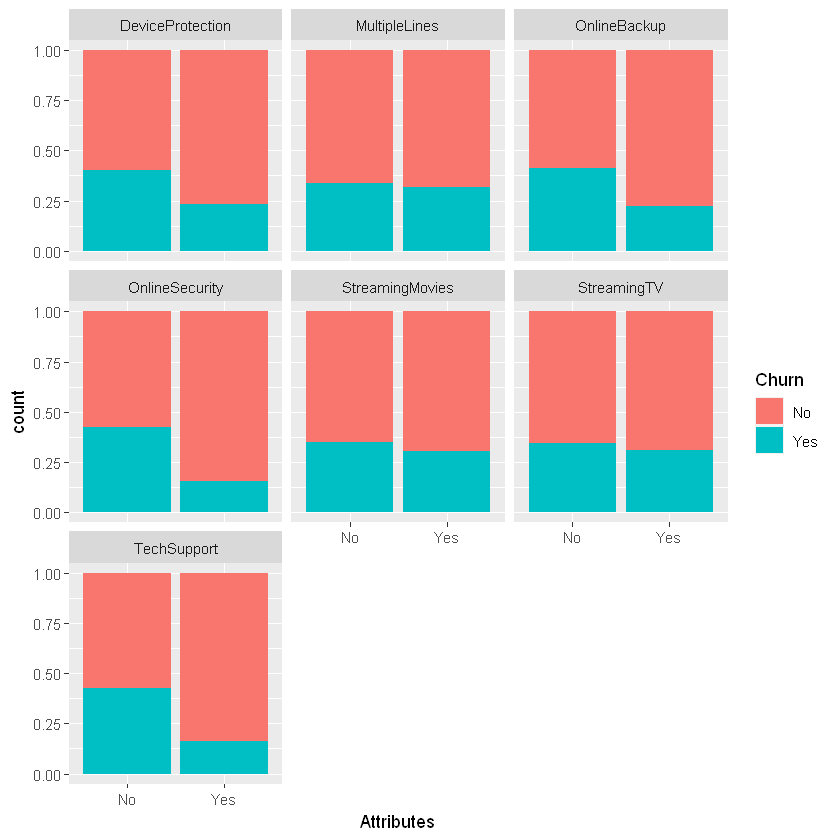

In [14]:
ggplot(c3)+
  geom_bar(aes(x = value, fill = Churn), position = "fill", stat = "count")+
  facet_wrap(~columns)+ 
  xlab("Attributes")


The customers who subscribe the service of DeviceProtection, OnlineBackup, OnlineSecurity and TechSupport have lower 
churn rate compared to the customers who don't. However, the churn rates do not have big difference between customers 
who have the service of MultipleLines, StreamingMovies and StreamingTV or not. 

In [15]:
c4 <- categorical %>%
dplyr::select(Contract:Churn)

ggplot(c4) +
  geom_bar(aes(x = Contract, fill = Churn), position = "fill", stat = "count", 
           show.legend = F) -> p7

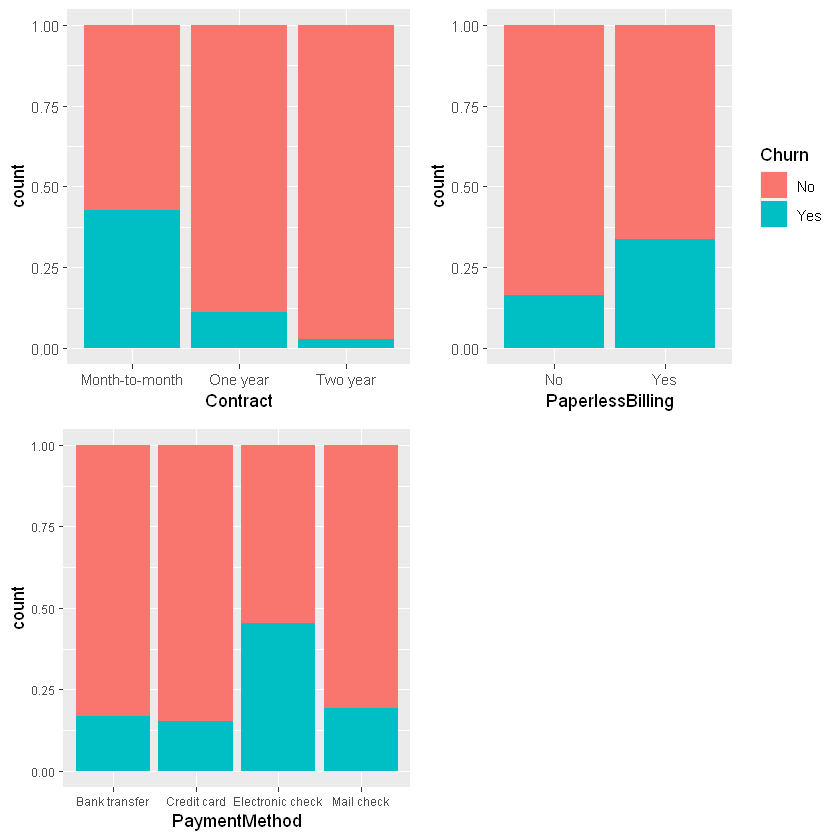

In [16]:
ggplot(c4) +
  geom_bar(aes(x = PaperlessBilling, fill = Churn), position = "fill", stat = "count", 
           show.legend = T) -> p8

ggplot(c4) +
  geom_bar(aes(x = PaymentMethod, fill = Churn), position = "fill", stat = "count", 
           show.legend = F) +
  scale_x_discrete(labels = c("Bank transfer", "Credit card", "Electronic check", "Mail check"))+
  theme(axis.text= element_text(size=7)) -> p9

ggarrange(p7,p8,p9, ncol = 2, nrow = 2)

The customers who sign longer contract have lower churn rate (Two year < One year < Month-to-month).  
The customers who choose paperlessbilling have higher churn rate.   
The customers who pay with electronic check have higher churn rate than customers who pay with other methods.  
       

Lastly, I will check if churn rates are different among the attributes about customers' basic information. 


In [17]:

categorical %>%
  dplyr::select(gender:Dependents, PhoneService, InternetService, Churn) %>%
  mutate(Gender_male = ifelse(gender =="Male", "Yes", "No")) -> c1 


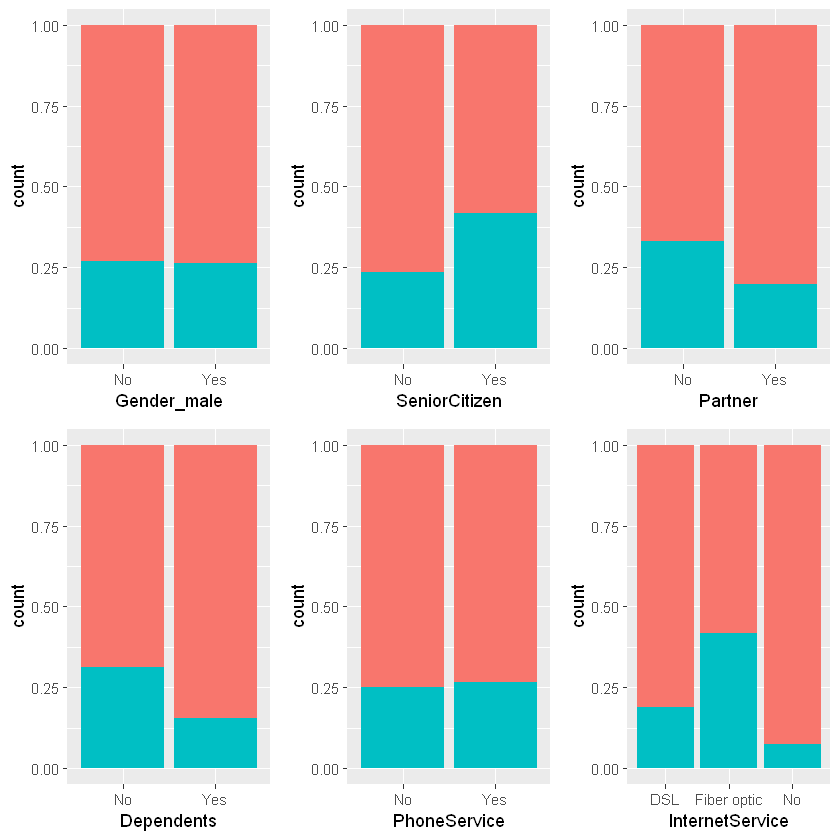

In [18]:
c1$gender <- NULL

ggplot(c1) +
  geom_bar(aes(x = Gender_male, fill = Churn), position = "fill", stat = "count", 
           show.legend = F) -> p1
ggplot(c1) +
  geom_bar(aes(x = SeniorCitizen, fill = Churn), position = "fill", stat = "count", 
           show.legend = F) -> p2
 ggplot(c1) +
  geom_bar(aes(x = Partner, fill = Churn), position = "fill", stat = "count", 
           show.legend = F) -> p3    
 ggplot(c1) +
  geom_bar(aes(x = Dependents, fill = Churn), position = "fill", stat = "count", 
           show.legend = F) -> p4  
ggplot(c1) +
  geom_bar(aes(x = PhoneService, fill = Churn), position = "fill", stat = "count", 
           show.legend = F) -> p5
ggplot(c1) +
  geom_bar(aes(x = InternetService, fill = Churn), position = "fill", stat = "count", 
           show.legend = F) -> p6
           
ggarrange(p1,p2,p3,p4,p5,p6, ncol = 3, nrow = 2)

The churn rates are not changed by genders and phone service.   
The senior customers have higher churn rate.   
The customers who have partners or dependents have lower churn rate.

In [19]:
telco %>%
  summarise(Total = n(), n_Churn = sum(Churn == "Yes"), p_Churn = n_Churn/Total)

Total,n_Churn,p_Churn
7032,1869,0.265785


There are 26.6% of customers churn.

# Logistic Regression Model

### Data Preparation
To prepare the data for logistic regression, I would modify binomial charactors to (0,1) and change the SeniorCitizen column from int to num.


In [20]:
telco_lr <- telco

In [21]:
telco_lr %>%
  mutate(Churn = ifelse(Churn == "Yes", 1, 0)) -> telco_lr
telco_lr %>%
  mutate(gender = ifelse(gender == "Female", 1, 0)) -> telco_lr
telco_lr %>%
  mutate(Partner = ifelse(Partner == "Yes", 1, 0)) -> telco_lr
telco_lr %>%
  mutate(PhoneService = ifelse(PhoneService == "Yes", 1, 0)) -> telco_lr
telco_lr %>%
  mutate(Dependents = ifelse(Dependents == "Yes", 1, 0)) -> telco_lr
telco_lr %>%
  mutate(PaperlessBilling = ifelse(PaperlessBilling == "Yes", 1, 0)) -> telco_lr

I delete the customerID and make one-hot coding to create dummy variables for all charactor variables.


In [22]:
telco_lr$customerID <- NULL
dmy <- dummyVars(" ~ .", data = telco_lr)
dmy <- data.frame(predict(dmy, newdata = telco_lr))
str(dmy)

'data.frame':	7032 obs. of  46 variables:
 $ gender                                : num  1 0 0 0 1 1 0 1 1 0 ...
 $ SeniorCitizen                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner                               : num  1 0 0 0 0 0 0 0 1 0 ...
 $ Dependents                            : num  0 0 0 0 0 0 1 0 0 1 ...
 $ PhoneService                          : num  0 1 1 0 1 1 1 0 1 1 ...
 $ MultipleLinesNo                       : num  0 1 1 0 1 0 0 0 0 1 ...
 $ MultipleLinesNo.phone.service         : num  1 0 0 1 0 0 0 1 0 0 ...
 $ MultipleLinesYes                      : num  0 0 0 0 0 1 1 0 1 0 ...
 $ InternetServiceDSL                    : num  1 1 1 1 0 0 0 1 0 1 ...
 $ InternetServiceFiber.optic            : num  0 0 0 0 1 1 1 0 1 0 ...
 $ InternetServiceNo                     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OnlineSecurityNo                      : num  1 0 0 0 1 1 1 0 1 0 ...
 $ OnlineSecurityNo.internet.service     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OnlineSecurityYes  

Then, I remove the variables with "No Phone Service" because they don't have any predicting power 

In [23]:
dmy$MultipleLinesNo.phone.service <- NULL
dmy$OnlineSecurityNo.internet.service <- NULL
dmy$OnlineBackupNo.internet.service <- NULL
dmy$DeviceProtectionNo.internet.service <- NULL
dmy$TechSupportNo.internet.service <- NULL
dmy$StreamingTVNo.internet.service <- NULL
dmy$StreamingMoviesNo.internet.service <- NULL

Finally, I remove the last level of each factor to avoid singularities.

In [24]:
dmy$ContractTwo.year <- NULL
dmy$InternetServiceNo <- NULL
dmy$PaymentMethodMailed.check <- NULL
dmy$tenure_year5.6.years <- NULL

In [25]:
# FINAL DATASET FOR LR
str(dmy)

'data.frame':	7032 obs. of  35 variables:
 $ gender                                : num  1 0 0 0 1 1 0 1 1 0 ...
 $ SeniorCitizen                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner                               : num  1 0 0 0 0 0 0 0 1 0 ...
 $ Dependents                            : num  0 0 0 0 0 0 1 0 0 1 ...
 $ PhoneService                          : num  0 1 1 0 1 1 1 0 1 1 ...
 $ MultipleLinesNo                       : num  0 1 1 0 1 0 0 0 0 1 ...
 $ MultipleLinesYes                      : num  0 0 0 0 0 1 1 0 1 0 ...
 $ InternetServiceDSL                    : num  1 1 1 1 0 0 0 1 0 1 ...
 $ InternetServiceFiber.optic            : num  0 0 0 0 1 1 1 0 1 0 ...
 $ OnlineSecurityNo                      : num  1 0 0 0 1 1 1 0 1 0 ...
 $ OnlineSecurityYes                     : num  0 1 1 1 0 0 0 1 0 1 ...
 $ OnlineBackupNo                        : num  0 1 0 1 1 1 0 1 1 0 ...
 $ OnlineBackupYes                       : num  1 0 1 0 0 0 1 0 0 1 ...
 $ DeviceProtectionNo 


### Split the data into training and test sets (75% vs 25%)

In [26]:
set.seed(818)
assignment <- sample(0:1, size= nrow(dmy), prob = c(0.75,0.25), replace = TRUE)
train <- dmy[assignment == 0, ]
test <- dmy[assignment == 1, ]

Double check if the churn rates of two sets are close.

In [27]:
# For the Training Set:
train %>%
  summarise(Total = n(), n_Churn = sum(Churn == 1), p_Churn = n_Churn/Total)
# For the Test Set:
test %>%
  summarise(Total = n(), n_Churn = sum(Churn == 1), p_Churn = n_Churn/Total)

Total,n_Churn,p_Churn
5226,1389,0.2657865


Total,n_Churn,p_Churn
1806,480,0.2657807


Now, the data is ready for training logistic regression models! 


### Train Models

I will first use all columns to build the model1. Then we would do backwards elimination to remove variables based on AIC and significance.



In [28]:
model1 <- glm(Churn ~., family = "binomial", data = train)
summary(model1)


Call:
glm(formula = Churn ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0913  -0.6490  -0.2846   0.6246   3.1189  

Coefficients: (7 not defined because of singularities)
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                            -4.201e+00  4.115e-01 -10.209  < 2e-16
gender                                  2.520e-02  7.628e-02   0.330 0.741121
SeniorCitizen                           2.021e-01  9.896e-02   2.042 0.041166
Partner                                -6.434e-02  9.082e-02  -0.708 0.478692
Dependents                             -1.974e-01  1.054e-01  -1.872 0.061148
PhoneService                            1.245e+00  9.481e-01   1.313 0.189234
MultipleLinesNo                        -5.581e-01  2.081e-01  -2.682 0.007329
MultipleLinesYes                               NA         NA      NA       NA
InternetServiceDSL                      3.979e+00  2.430e+00 

Notice there are 6 NAs in the model's summary for MultipleLinesYes, OnlineSecurityYes, OnlineBackupYes, 
DeviceProtectionYes, TechSupportYes, StreamingTVYes, StreamingMoviesYes. That's because I remove the "xxx.No Phone Service" 
or "xxx.No Internet Service" of them when processing dummy variables. Only two values of "xxx.yes" and "xxx.no" are left with absolutely multicollinearities between them. This problem will be address during the following variable selection.      

I use AIC to exclude variables based on their significance and create model2.

In [29]:
model2 <- stepAIC(model1, trace = 0)
summary(model2)


Call:
glm(formula = Churn ~ SeniorCitizen + Dependents + PhoneService + 
    MultipleLinesNo + InternetServiceDSL + InternetServiceFiber.optic + 
    OnlineBackupNo + DeviceProtectionNo + StreamingTVNo + StreamingMoviesNo + 
    ContractMonth.to.month + ContractOne.year + PaperlessBilling + 
    PaymentMethodElectronic.check + MonthlyCharges + TotalCharges + 
    tenure_year0.1.year + tenure_year1.2.years, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1080  -0.6467  -0.2864   0.6176   3.0767  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -3.972e+00  2.863e-01 -13.873  < 2e-16 ***
SeniorCitizen                  1.915e-01  9.821e-02   1.949 0.051238 .  
Dependents                    -2.288e-01  9.584e-02  -2.387 0.016980 *  
PhoneService                   1.743e+00  3.666e-01   4.753 2.00e-06 ***
MultipleLinesNo               -6.565e-01  1.122e-01  -5

Use VIF function to check multicollinearity


In [30]:
vif(model2)

SeniorCitizen                    Dependents 
                     1.130376                      1.062154 
                 PhoneService               MultipleLinesNo 
                     8.586244                      2.167654 
           InternetServiceDSL    InternetServiceFiber.optic 
                    91.376589                    196.197855 
               OnlineBackupNo            DeviceProtectionNo 
                     2.092320                      2.192022 
                StreamingTVNo             StreamingMoviesNo 
                     4.464807                      4.557877 
       ContractMonth.to.month              ContractOne.year 
                     4.347735                      3.523669 
             PaperlessBilling PaymentMethodElectronic.check 
                     1.123025                      1.156804 
               MonthlyCharges                  TotalCharges 
                    85.085275                      5.639049 
          tenure_year0.1.year          tenure_year1.2.years 
                     3.841926                      2.053863


The VIFs for MonthlyCharges, InternetServiceDSL and InternetserviceFiber.optic are very high due to multicollinearity. 
Since TotalCharges has high correlation with MonthlyCharges and tenure (see the correlation plot above), I will remove 
the TotalCharges variable . The InternetserviceFiber.optic will also be removed from model3.

In [31]:
model3 <- glm(formula = Churn ~  SeniorCitizen + Dependents + PhoneService + MultipleLinesNo + InternetServiceDSL + OnlineBackupNo +
DeviceProtectionNo + StreamingTVNo + StreamingMoviesNo + ContractMonth.to.month + ContractOne.year + 
PaperlessBilling + PaymentMethodElectronic.check + MonthlyCharges + tenure_year0.1.year + tenure_year1.2.years,
family = "binomial", data = train)

summary(model3)
vif(model3)


Call:
glm(formula = Churn ~ SeniorCitizen + Dependents + PhoneService + 
    MultipleLinesNo + InternetServiceDSL + OnlineBackupNo + DeviceProtectionNo + 
    StreamingTVNo + StreamingMoviesNo + ContractMonth.to.month + 
    ContractOne.year + PaperlessBilling + PaymentMethodElectronic.check + 
    MonthlyCharges + tenure_year0.1.year + tenure_year1.2.years, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0083  -0.6789  -0.2938   0.6644   3.2270  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -4.504157   0.265349 -16.974  < 2e-16 ***
SeniorCitizen                  0.237861   0.096606   2.462  0.01381 *  
Dependents                    -0.228336   0.094864  -2.407  0.01609 *  
PhoneService                  -0.671504   0.170551  -3.937 8.24e-05 ***
MultipleLinesNo               -0.177117   0.094339  -1.877  0.06046 .  
InternetServiceDSL            -0.5210

SeniorCitizen                    Dependents 
                     1.124113                      1.060713 
                 PhoneService               MultipleLinesNo 
                     1.854248                      1.568908 
           InternetServiceDSL                OnlineBackupNo 
                     1.727140                      1.222350 
           DeviceProtectionNo                 StreamingTVNo 
                     1.369397                      1.458962 
            StreamingMoviesNo        ContractMonth.to.month 
                     1.456587                      4.026831 
             ContractOne.year              PaperlessBilling 
                     3.463904                      1.120896 
PaymentMethodElectronic.check                MonthlyCharges 
                     1.134265                      2.319885 
          tenure_year0.1.year          tenure_year1.2.years 
                     2.087866                      1.397821


Now all VIFs are fine below 5. but the p-values for StreamingTVNo and StreamingMoviesNo are still very high. 
So I remove these two variables and create model 4.

In [32]:
model4 <- glm(formula = Churn ~  SeniorCitizen + Dependents + PhoneService + MultipleLinesNo + InternetServiceDSL + OnlineBackupNo +
DeviceProtectionNo + ContractMonth.to.month + ContractOne.year + 
PaperlessBilling + PaymentMethodElectronic.check + MonthlyCharges + tenure_year0.1.year + tenure_year1.2.years,
family = "binomial", data = train)

summary(model4)
vif(model4)


Call:
glm(formula = Churn ~ SeniorCitizen + Dependents + PhoneService + 
    MultipleLinesNo + InternetServiceDSL + OnlineBackupNo + DeviceProtectionNo + 
    ContractMonth.to.month + ContractOne.year + PaperlessBilling + 
    PaymentMethodElectronic.check + MonthlyCharges + tenure_year0.1.year + 
    tenure_year1.2.years, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9847  -0.6712  -0.2963   0.6617   3.2304  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -4.509179   0.265472 -16.986  < 2e-16 ***
SeniorCitizen                  0.234414   0.096469   2.430  0.01510 *  
Dependents                    -0.227876   0.094864  -2.402  0.01630 *  
PhoneService                  -0.682343   0.169926  -4.016 5.93e-05 ***
MultipleLinesNo               -0.175661   0.094284  -1.863  0.06245 .  
InternetServiceDSL            -0.537947   0.105220  -5.113 3.18e-07 ***
Online

SeniorCitizen                    Dependents 
                     1.122007                      1.060576 
                 PhoneService               MultipleLinesNo 
                     1.843886                      1.567001 
           InternetServiceDSL                OnlineBackupNo 
                     1.666003                      1.193805 
           DeviceProtectionNo        ContractMonth.to.month 
                     1.220802                      3.993417 
             ContractOne.year              PaperlessBilling 
                     3.463950                      1.119506 
PaymentMethodElectronic.check                MonthlyCharges 
                     1.131827                      2.305339 
          tenure_year0.1.year          tenure_year1.2.years 
                     2.076790                      1.396708

Model4 looks good! It is used as my final model to predict churn on train and test set. 

### Cross Validation (Confusion Matrix & ROC)

In [33]:
model_logit <- model4
predict(model_logit, data = train, type = "response") -> train_prob
predict(model_logit, newdata = test, type = "response") -> test_prob

Set the threshold as 0.5 by default.

In [34]:
train_pred <- factor(ifelse(train_prob >= 0.5, "Yes", "No"))
train_actual <- factor(ifelse(train$Churn == 1, "Yes", "No"))
test_pred <- factor(ifelse(test_prob >= 0.5, "Yes", "No"))
test_actual <- factor(ifelse(test$Churn == 1, "Yes", "No"))

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3489  686
       Yes  348  703
                                          
               Accuracy : 0.8021          
                 95% CI : (0.7911, 0.8129)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4504          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9093          
            Specificity : 0.5061          
         Pos Pred Value : 0.8357          
         Neg Pred Value : 0.6689          
             Prevalence : 0.7342          
         Detection Rate : 0.6676          
   Detection Prevalence : 0.7989          
      Balanced Accuracy : 0.7077          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1186  248
       Yes  140  232
                                          
               Accuracy : 0.7852          
                 95% CI : (0.7655, 0.8039)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 3.182e-07       
                                          
                  Kappa : 0.407           
                                          
 Mcnemar's Test P-Value : 5.569e-08       
                                          
            Sensitivity : 0.8944          
            Specificity : 0.4833          
         Pos Pred Value : 0.8271          
         Neg Pred Value : 0.6237          
             Prevalence : 0.7342          
         Detection Rate : 0.6567          
   Detection Prevalence : 0.7940          
      Balanced Accuracy : 0.6889          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


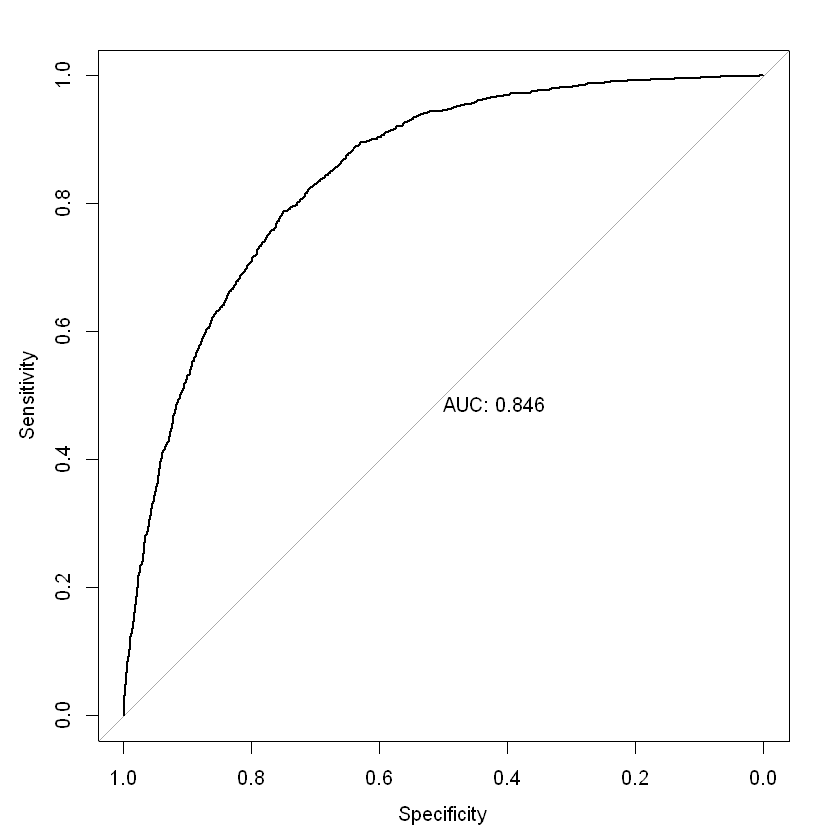

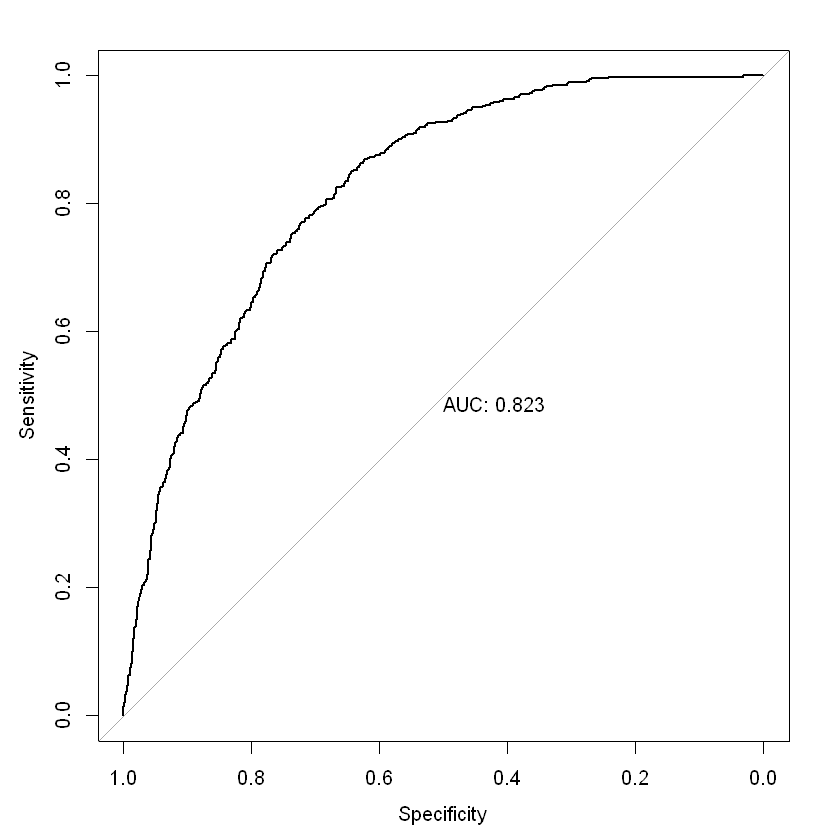

In [35]:
# For the Training Set:
confusionMatrix(data = train_pred, reference = train_actual)
roc <- roc(train$Churn, train_prob, plot= TRUE, print.auc=TRUE)

# For the Test Set: 
confusionMatrix(data = test_pred, reference = test_actual)
roc <- roc(test$Churn, test_prob, plot= TRUE, print.auc=TRUE)




For the training set, the accuracy is 0.80 and the AUC is 0.85. For the test set, the accuracy is 0.79 and the AUC is 0.82.
It's a good model because the accuracy and AUC do not have big difference between the training and test sets. 
But the Specificities for two sets are as low as 0.46. 

In real case, we can adjust the threshold based on the cost of TN, FN, FP or TP to reduce cost or loss. But here, I just tend 
to find the optimal threshold (or cutoff) point that maximises the specificity (TN rate) and sensitivity (TP rate).

### Find the optimal cutoff and adjust the class of prediction

In [36]:
pred <- prediction(train_prob, train_actual)
perf <- performance(pred, "spec", "sens")

cutoffs <- data.frame(cut=perf@alpha.values[[1]], specificity=perf@x.values[[1]], 
                      sensitivity= perf@y.values[[1]])

In [37]:
opt_cutoff <- cutoffs[which.min(abs(cutoffs$specificity-cutoffs$sensitivity)),]
opt_cutoff

,cut,specificity,sensitivity
1898,0.3012029,0.7631389,0.7628355


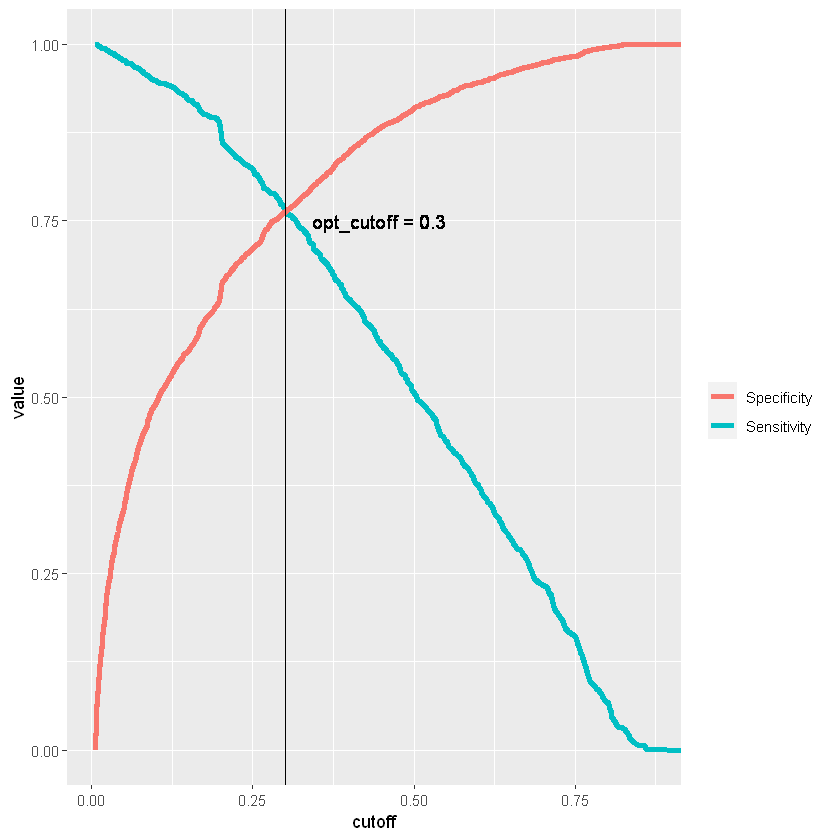

In [38]:
ggplot(data = cutoffs) +
  geom_line(aes(x = cut, y = specificity, color ="red"), size = 1.5)+
  geom_line(aes(x = cut, y = sensitivity, color = "blue"), size = 1.5) +
  labs(x = "cutoff", y ="value") +
  scale_color_discrete(name = "", labels = c("Specificity", "Sensitivity"))+
  geom_vline(aes(xintercept = opt_cutoff$cut))+
  geom_text(aes(x= 0.55, y= 0.75),label="opt_cutoff = 0.3",hjust=1, size=4)

The optimal cutoff is 0.3. So I use it as the threshold to predict churn on training and test sets.


In [39]:
# Prediction on training set with threshold = 0.3:
train_pred_c <- factor(ifelse(train_prob >= 0.3, "Yes", "No"))
confusionMatrix(data = train_pred_c, reference = train_actual)

# Prediction on test set with threshold = 0.3:
predict(model_logit, newdata = test, type = "response") -> test_prob
test_pred_c <- factor(ifelse(test_prob >= 0.3, "Yes", "No"))
confusionMatrix(data = test_pred_c, reference = test_actual)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  2925  327
       Yes  912 1062
                                          
               Accuracy : 0.7629          
                 95% CI : (0.7511, 0.7744)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 1.091e-06       
                                          
                  Kappa : 0.4645          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7623          
            Specificity : 0.7646          
         Pos Pred Value : 0.8994          
         Neg Pred Value : 0.5380          
             Prevalence : 0.7342          
         Detection Rate : 0.5597          
   Detection Prevalence : 0.6223          
      Balanced Accuracy : 0.7634          
                                          
       'Positive' Class : No              
                        

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  961 112
       Yes 365 368
                                          
               Accuracy : 0.7359          
                 95% CI : (0.7149, 0.7561)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 0.4486          
                                          
                  Kappa : 0.4207          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7247          
            Specificity : 0.7667          
         Pos Pred Value : 0.8956          
         Neg Pred Value : 0.5020          
             Prevalence : 0.7342          
         Detection Rate : 0.5321          
   Detection Prevalence : 0.5941          
      Balanced Accuracy : 0.7457          
                                          
       'Positive' Class : No              
                              



For the training set, the Accuracy is 0.76, and the Sensitivity and Specificity are both about 0.76.
For the test set, the Accuracy is 0.74, and the Sensitivity and Specificity are 0.74 and 0.73 respectively.
Overall, this model with adjusted cutoff works well. 


### Summary for Logistic Regression Model
The final Logistic Regression Model (with threshold = 0.5) has Accuracy of 0.79 and the AUC is 0.82. Based on the P values 
for variables, PhoneService, InternetServiceDSL, OnlineBackup, Contract, PaperleslsBilling, PaymentMethodElectronic.check, 
MonthlyCharges, tenure in 0-1 year and 1-2 years have more significant influence on predicting churn.




# Decision Tree
### Data Preparation
Decision tree models can handle categorical variables without one-hot encoding them, and one-hot encoding will degrade 
tree-model performance. Thus, I will re-prepare the data for decision tree and random forest models. I keep the "telco" data 
before I did logistic regression and change the charactor variables to factors. Here's the final dataset I use for training 
classification tree models.

In [40]:
telcotree <- telco
telcotree$customerID <- NULL
telcotree %>%
  mutate_if(is.character, as.factor) -> telcotree
str(telcotree)

'data.frame':	7032 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No internet service",..: 1 1 1 3 1 1 1 1 3 1 ...
 $ StreamingTV     : Factor w/ 3 levels

In [75]:
#set.seed(123)
#boruta.train <- Boruta(Churn~., data = telcotree, doTrace = 2)
#print(boruta.train)

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
After 11 iterations, +38 secs: 
 confirmed 15 attributes: Contract, DeviceProtection, InternetService, MonthlyCharges, MultipleLines and 10 more;
 still have 4 attributes left.

 12. run of importance source...
 13. run of importance source...
 14. run of importance source...
 15. run of importance source...
After 15 iterations, +53 secs: 
 confirmed 1 attribute: Partner;
 rejected 1 attribute: gender;
 still have 2 attributes left.

 16. run of importance source...
 17. run of importance source...
 18. run of importance source...
 19. run of importance source...
 20. run of importance source...
 21. run of importance source...
 22. run o

Boruta performed 99 iterations in 6.006375 mins.
 17 attributes confirmed important: Contract, Dependents,
DeviceProtection, InternetService, MonthlyCharges and 12 more;
 1 attributes confirmed unimportant: gender;
 1 tentative attributes left: PhoneService;


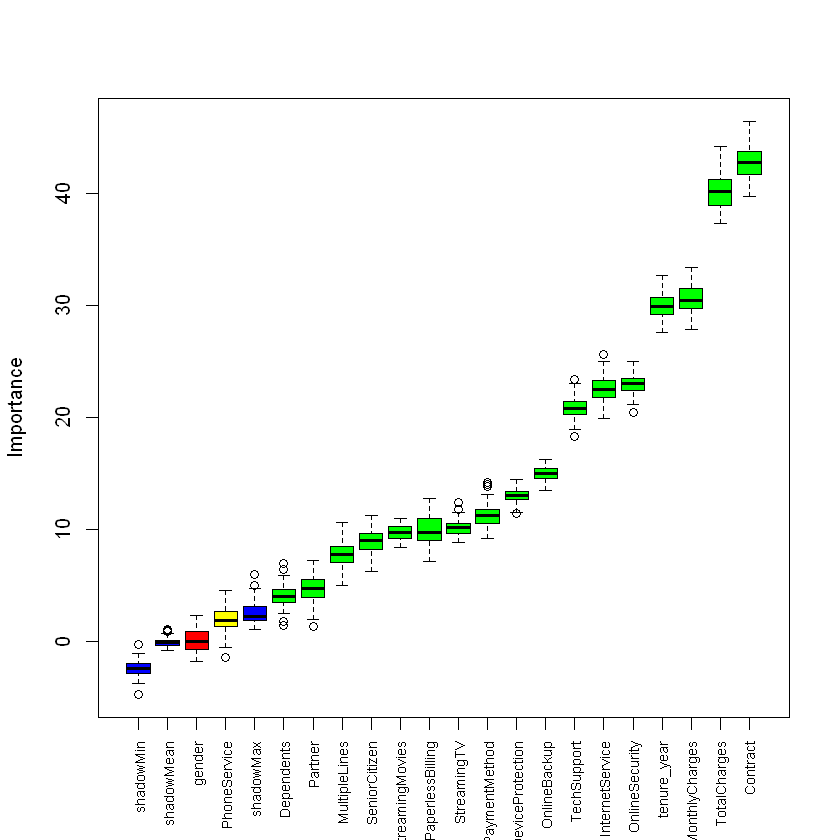

In [76]:
# plot(boruta.train, xlab = "", xaxt = "n")
#lz<-lapply(1:ncol(boruta.train$ImpHistory),function(i)
#boruta.train$ImpHistory[is.finite(boruta.train$ImpHistory[,i]),i])
#names(lz) <- colnames(boruta.train$ImpHistory)
#Labels <- sort(sapply(lz,median))
#axis(side = 1,las=2,labels = names(Labels),
#at = 1:ncol(boruta.train$ImpHistory), cex.axis = 0.7)

In [41]:

# Split the data into training and test sets.

set.seed(818)
tree <- sample(0:1, size= nrow(telcotree), prob = c(0.75,0.25), replace = TRUE)
traintree <- telcotree[tree == 0, ]
testtree <- telcotree[tree == 1, ]


### Train Model1
First of all, I use all variables to build the model_tree1. 

In [42]:
model_tree1 <- rpart(formula = Churn ~., data = traintree, 
                     method = "class", parms = list(split = "gini"))
model_tree1

n= 5226 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 5226 1389 No (0.73421355 0.26578645)  
   2) Contract=One year,Two year 2375  159 No (0.93305263 0.06694737) *
   3) Contract=Month-to-month 2851 1230 No (0.56857243 0.43142757)  
     6) InternetService=DSL,No 1296  363 No (0.71990741 0.28009259) *
     7) InternetService=Fiber optic 1555  688 Yes (0.44244373 0.55755627)  
      14) TotalCharges>=1556.25 730  297 No (0.59315068 0.40684932) *
      15) TotalCharges< 1556.25 825  255 Yes (0.30909091 0.69090909) *

* <b> Method </b> - One of "anova", "poisson", "class" or "exp". If method is missing then
the routine tries to make an intelligent guess. 
*  If y is a survival object, then
method = "exp" is assumed, 
* if y has 2 columns then method = "poisson"
is assumed, 
* if y is a factor then method = "class" is assumed, 
* otherwise method = "anova" is assumed. 

* <b> Parms </b> -  The
splitting index can be gini or information. The default priors are proportional
to the data counts, the losses default to 1, and the split defaults to gini.


In [43]:
### Cross Validation (Confusion Matrix and AUC) for modeltree1

predict(model_tree1, data = traintree, type = "class") -> traintree_pred1
predict(model_tree1, data = traintree, type = "prob") -> traintree_prob1
predict(model_tree1, newdata= testtree, type = "class") -> testtree_pred1
predict(model_tree1, newdata = testtree, type = "prob") -> testtree_prob1

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3582  819
       Yes  255  570
                                          
               Accuracy : 0.7945          
                 95% CI : (0.7833, 0.8054)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3951          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9335          
            Specificity : 0.4104          
         Pos Pred Value : 0.8139          
         Neg Pred Value : 0.6909          
             Prevalence : 0.7342          
         Detection Rate : 0.6854          
   Detection Prevalence : 0.8421          
      Balanced Accuracy : 0.6720          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


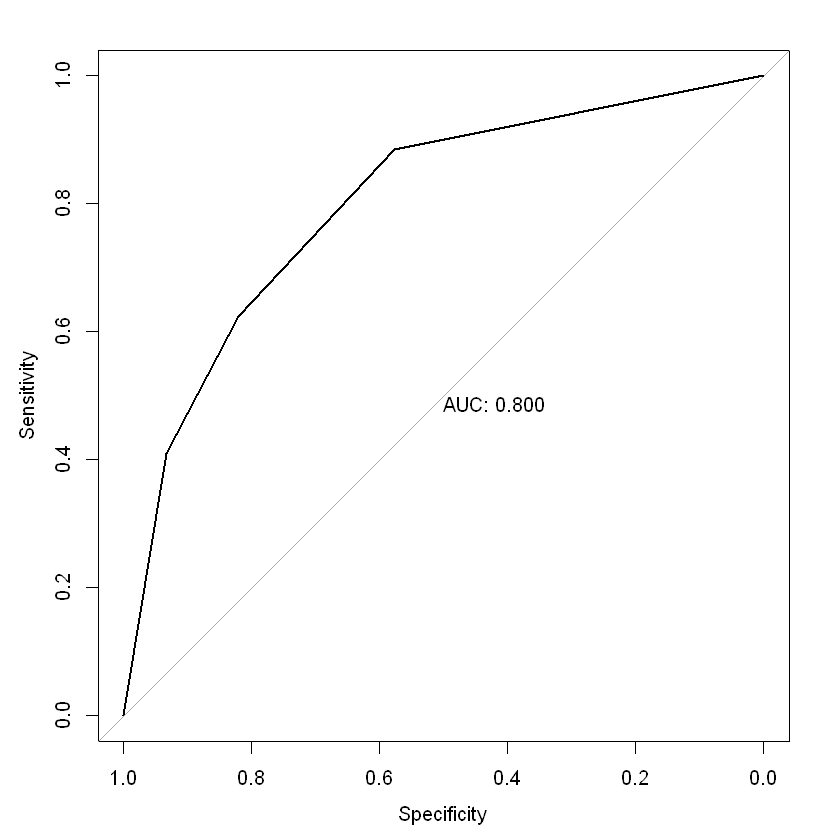

In [44]:
# For the Training Set

confusionMatrix(data = traintree_pred1, reference = traintree$Churn)
traintree_actual <- ifelse(traintree$Churn == "Yes", 1,0)
roc <- roc(traintree_actual, traintree_prob1[,2], plot= TRUE, print.auc=TRUE)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1216  286
       Yes  110  194
                                          
               Accuracy : 0.7807          
                 95% CI : (0.7609, 0.7996)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 2.889e-06       
                                          
                  Kappa : 0.3638          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9170          
            Specificity : 0.4042          
         Pos Pred Value : 0.8096          
         Neg Pred Value : 0.6382          
             Prevalence : 0.7342          
         Detection Rate : 0.6733          
   Detection Prevalence : 0.8317          
      Balanced Accuracy : 0.6606          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


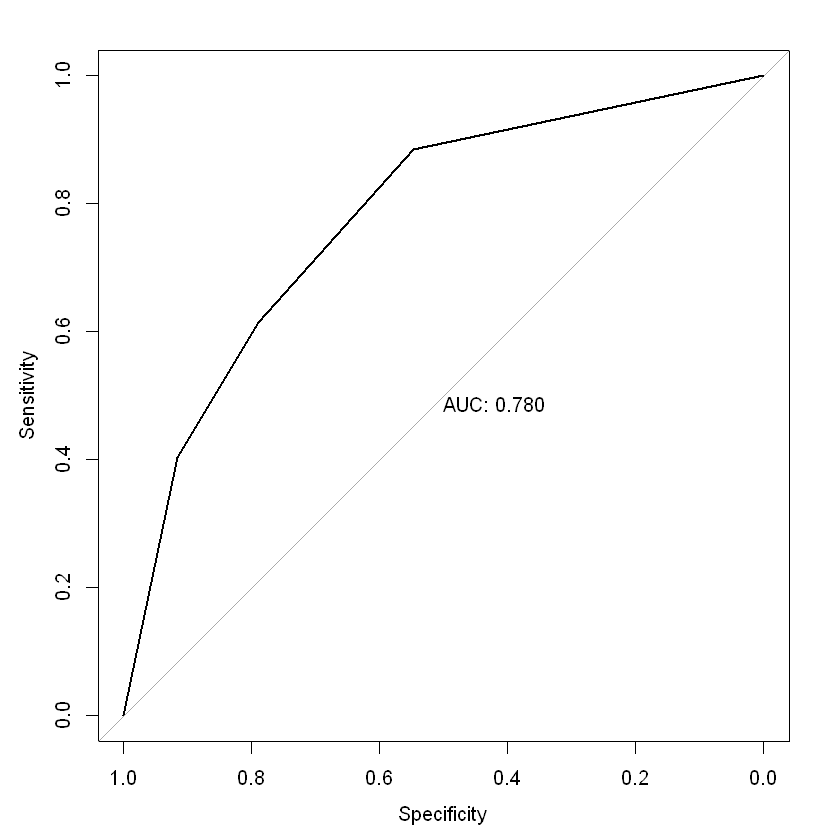

In [45]:

# For the Test Set:

confusionMatrix(data = testtree_pred1, reference = testtree$Churn)
testtree_actual <- ifelse(testtree$Churn == "Yes", 1,0)
roc <- roc(testtree_actual, testtree_prob1[,2], plot = TRUE, print.auc = TRUE)

For the training set, the Accuracy is 0.79 and the AUC is 0.800. For the test set, the Accuracy is 0.78 and the AUC is 0.78.


### Train Model2
Remember that Totalcharges, MonthlyCharges and tenure are highly correlated, which may effect the performance of the 
decision tree models. So I remove the TotalCharges column to train the second model.


In [46]:

model_tree2 <- rpart(formula = Churn ~ gender + SeniorCitizen + Partner + Dependents + PhoneService + 
                       MultipleLines + InternetService + OnlineSecurity + TechSupport +
                       OnlineBackup + DeviceProtection + StreamingTV + StreamingMovies + 
                       Contract + PaperlessBilling + tenure_year +
                       PaymentMethod + MonthlyCharges, data = traintree, 
                       method = "class", parms = list(split = "gini"))

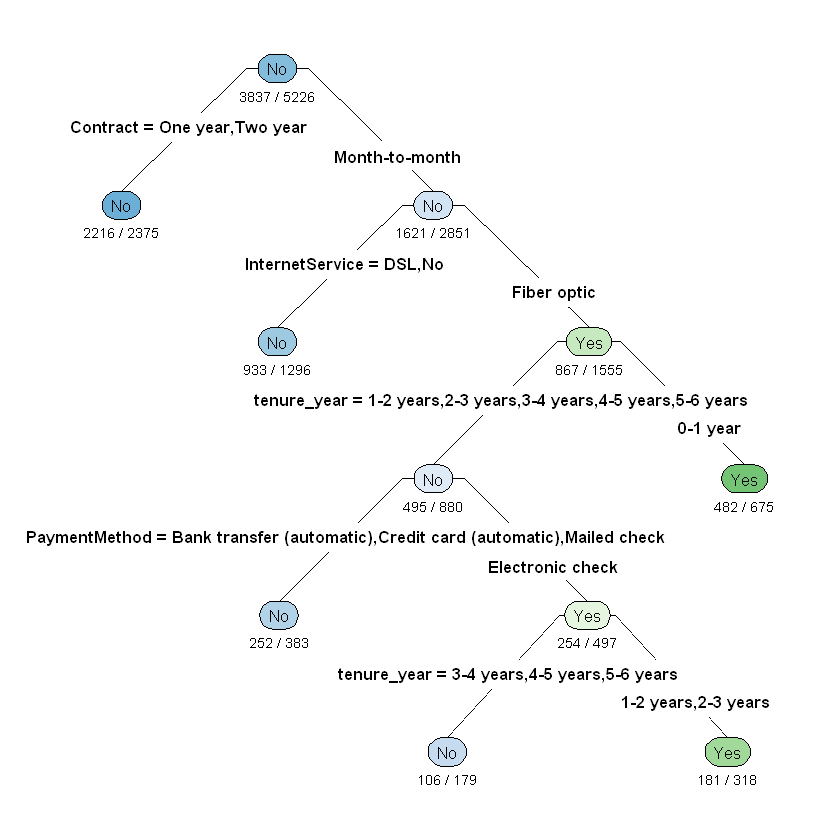

In [57]:
rpart.plot(
    model_tree2,
    type = 4,
    extra = 2,
    under = TRUE,
    fallen.leaves = F
)

* Type of plot. Five possibilities:

0 The default. Draw a split label at each split and a node label at each leaf.

1 Label all nodes, not just leaves. Similar to text.rpart's

* extra
Display extra information at the nodes. Possible values:
0 No extra information (the default).

1 Display the number of observations that fall in the node (per class for class objects;

* under
Applies only if extra > 0. Default FALSE, meaning put the extra text in the box. Use TRUE to put the text under the box.

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3507  726
       Yes  330  663
                                          
               Accuracy : 0.7979          
                 95% CI : (0.7868, 0.8087)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4305          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9140          
            Specificity : 0.4773          
         Pos Pred Value : 0.8285          
         Neg Pred Value : 0.6677          
             Prevalence : 0.7342          
         Detection Rate : 0.6711          
   Detection Prevalence : 0.8100          
      Balanced Accuracy : 0.6957          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1194  260
       Yes  132  220
                                          
               Accuracy : 0.7829          
                 95% CI : (0.7632, 0.8018)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 9.833e-07       
                                          
                  Kappa : 0.3921          
                                          
 Mcnemar's Test P-Value : 1.413e-10       
                                          
            Sensitivity : 0.9005          
            Specificity : 0.4583          
         Pos Pred Value : 0.8212          
         Neg Pred Value : 0.6250          
             Prevalence : 0.7342          
         Detection Rate : 0.6611          
   Detection Prevalence : 0.8051          
      Balanced Accuracy : 0.6794          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


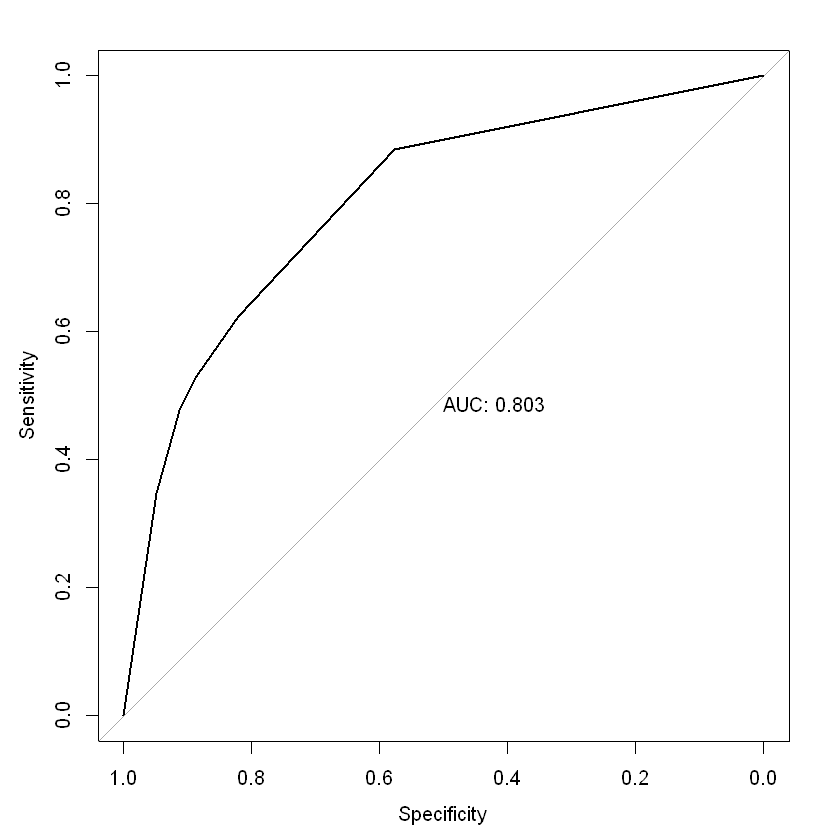

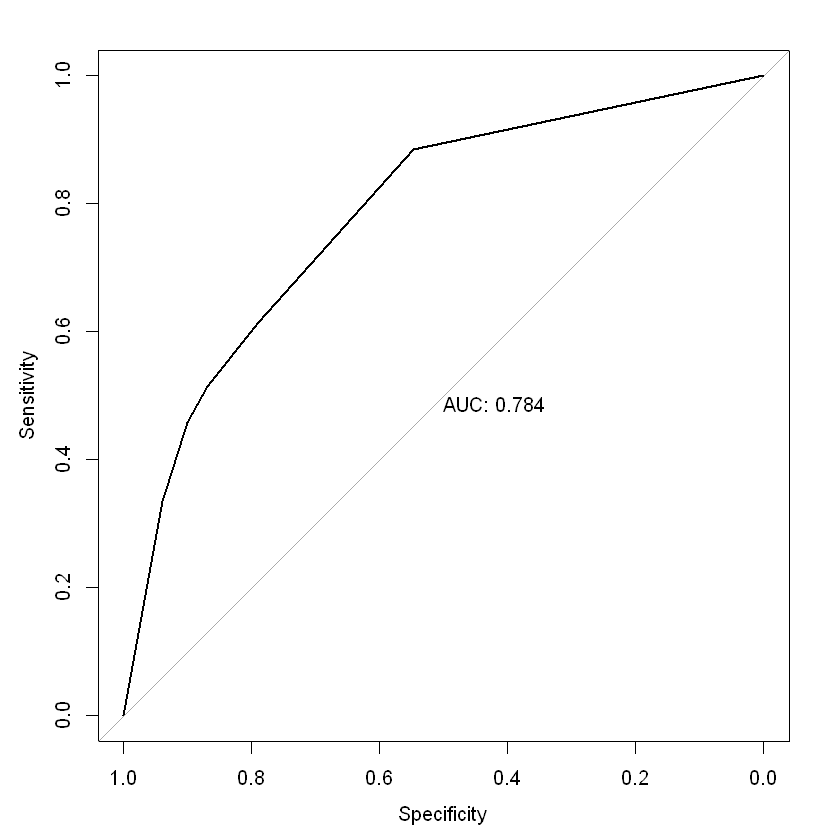

In [47]:

### Cross Validation for modeltree2

predict(model_tree2, data = traintree, type = "class") -> traintree_pred2
predict(model_tree2, data = traintree, type = "prob") -> traintree_prob2
predict(model_tree2, newdata= testtree, type = "class") -> testtree_pred2
predict(model_tree2, newdata = testtree, type = "prob") -> testtree_prob2

# For the Training Set:

confusionMatrix(data = traintree_pred2, reference = traintree$Churn)
traintree_actual <- ifelse(traintree$Churn == "Yes", 1,0)
roc <- roc(traintree_actual, traintree_prob2[,2], plot= TRUE, print.auc=TRUE)

# For the Test Set:

testtree_actual <- ifelse(testtree$Churn == "Yes", 1,0)
confusionMatrix(data = testtree_pred2, reference = testtree$Churn)
roc <- roc(testtree_actual, testtree_prob2[,2], plot = TRUE, print.auc = TRUE)



For the training set, the Accuracy is 0.80 and the AUC is 0.80. For the test set, the Accuracy is 0.78 and the AUC is 0.78.
Compared to the performance of the first model, the performance of the second model is just a little bit better. So I will 
use model 2 as the final classification tree model. There is still a problem that the Specificity is too low. 
But since I don't have the real conditions about costs for this case, I don't do cutoff optimization here for tree models.



### Summary for Decision Tree Model
The final decision tree model has Accuracy of 0.78 and AUC of 0.78 for the test set. It does not perform as good as the logistic 
regression model.


# Random Forest

### Data Preparation
I use the same data prepared for Classification Tree models.

In [58]:
### Train Model

set.seed(802)
modelrf1 <- randomForest(formula = Churn ~., data = traintree)
print(modelrf1)


Call:
 randomForest(formula = Churn ~ ., data = traintree) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 20.44%
Confusion matrix:
      No Yes class.error
No  3454 383  0.09981757
Yes  685 704  0.49316055


In [59]:
### Cross Validation for modelrf1

predict(modelrf1, traintree, type = "class") -> trainrf_pred
predict(modelrf1, traintree, type = "prob") -> trainrf_prob
predict(modelrf1, newdata = testtree, type = "class") -> testrf_pred
predict(modelrf1, newdata = testtree, type = "prob") -> testrf_prob

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3797   87
       Yes   40 1302
                                          
               Accuracy : 0.9757          
                 95% CI : (0.9712, 0.9797)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9371          
                                          
 Mcnemar's Test P-Value : 4.468e-05       
                                          
            Sensitivity : 0.9896          
            Specificity : 0.9374          
         Pos Pred Value : 0.9776          
         Neg Pred Value : 0.9702          
             Prevalence : 0.7342          
         Detection Rate : 0.7266          
   Detection Prevalence : 0.7432          
      Balanced Accuracy : 0.9635          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


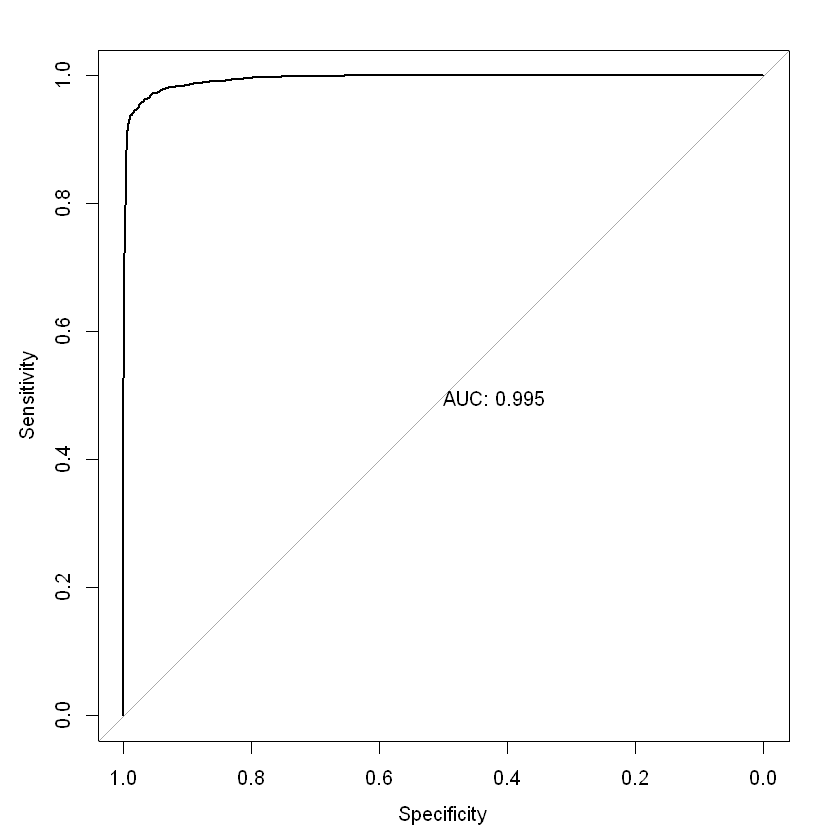

In [60]:
# For the Training Set: 

confusionMatrix(data = trainrf_pred, reference = traintree$Churn)
trainrf_actual <- ifelse(traintree$Churn == "Yes", 1,0)
roc <- roc(trainrf_actual, trainrf_prob[,2], plot= TRUE, print.auc=TRUE)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1177  236
       Yes  149  244
                                          
               Accuracy : 0.7868          
                 95% CI : (0.7672, 0.8055)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 1.320e-07       
                                          
                  Kappa : 0.4203          
                                          
 Mcnemar's Test P-Value : 1.171e-05       
                                          
            Sensitivity : 0.8876          
            Specificity : 0.5083          
         Pos Pred Value : 0.8330          
         Neg Pred Value : 0.6209          
             Prevalence : 0.7342          
         Detection Rate : 0.6517          
   Detection Prevalence : 0.7824          
      Balanced Accuracy : 0.6980          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


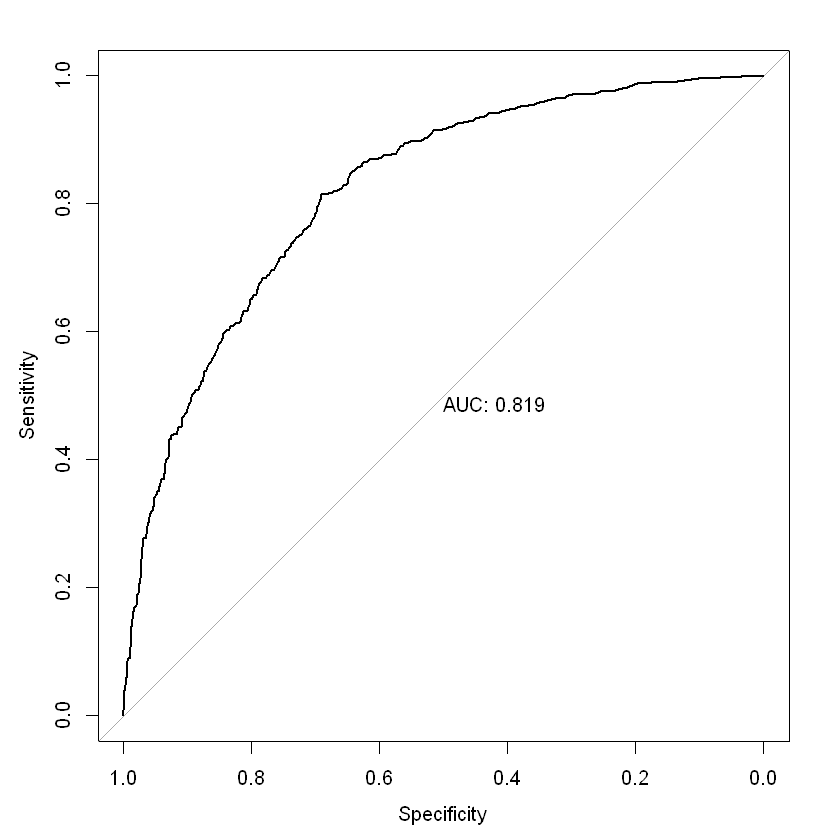

In [61]:
# For the Test Set:

confusionMatrix(data = testrf_pred, reference = testtree$Churn)
testrf_actual <- ifelse(testtree$Churn == "Yes", 1,0)
roc <- roc(testrf_actual, testrf_prob[,2], plot = TRUE, print.auc = TRUE)

For the training set, the Accuracy is 0.97 and the AUC is almost 1. For the test set, the Accuracy is 0.79 and the AUC is 0.82.


### Tuning 


mtry = 4  OOB error = 20.46% 
Searching left ...
mtry = 2 	OOB error = 20.02% 
0.02151543 0.05 
Searching right ...
mtry = 8 	OOB error = 20.8% 
-0.01683817 0.05 

Call:
 randomForest(x = x, y = y, mtry = res[which.min(res[, 2]), 1]) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.84%
Confusion matrix:
      No Yes class.error
No  3478 359  0.09356268
Yes  678 711  0.48812095


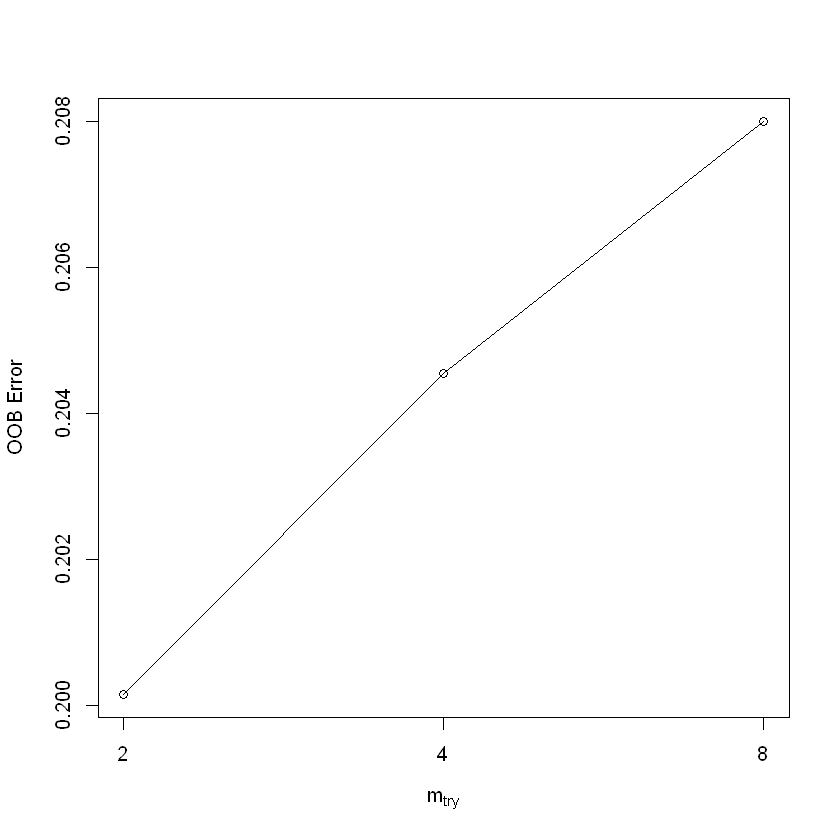

In [66]:

#### Tuning mtry with tuneRF

set.seed(818)
modelrf2 <- tuneRF(x = subset(traintree, select = -Churn), y = traintree$Churn, ntreeTry = 500, doBest = TRUE)
print(modelrf2)

# mtry - number of predictors sampled for spliting at each node.
# ntree - number of trees grown.

When mtry = 2, OOB decreases from 20.11% to 19.67%


In [65]:

#### Grid Search based on OOB error

# I first establish a list of possible values for mtry, nodesize and sampsize.

mtry <- seq(2, ncol(traintree) * 0.8, 2)
nodesize <- seq(3, 8, 2)
sampsize <- nrow(traintree) * c(0.7, 0.8)
hyper_grid <- expand.grid(mtry = mtry, nodesize = nodesize, sampsize = sampsize)

In [67]:

# Then, I create a loop to find the combination with the optimal oob err. 

oob_err <- c()
for (i in 1:nrow(hyper_grid)) {
  model <- randomForest(formula = Churn ~ ., 
                        data = traintree,
                        mtry = hyper_grid$mtry[i],
                        nodesize = hyper_grid$nodesize[i],
                        sampsize = hyper_grid$sampsize[i])
  oob_err[i] <- model$err.rate[nrow(model$err.rate), "OOB"]
  }

opt_i <- which.min(oob_err)
print(hyper_grid[opt_i,])

   mtry nodesize sampsize
17    2        7   3658.2


The optimal hyperparameters are mtry = 2, nodesize = 7, sampsize = 3658.2


In [68]:
### Train model 2 with optimal hyperparameters.

set.seed(802)
modelrf3 <- randomForest(formula = Churn ~., data = traintree, mtry = 2, nodesize = 7, sampsize = 3658.2)
print(modelrf3)


Call:
 randomForest(formula = Churn ~ ., data = traintree, mtry = 2,      nodesize = 7, sampsize = 3658.2) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.79%
Confusion matrix:
      No Yes class.error
No  3491 346  0.09017462
Yes  688 701  0.49532037



OOB of modelrf3 decreases a little bit to 19.79% with the optimal combination. The OOB of modelrf2 is 19.67%. 
So I will use modelrf2 as the final random forest model.

In [69]:
### Cross Validation for modelrf2

predict(modelrf2, traintree, type = "class") -> trainrf_pred2
predict(modelrf2, traintree, type = "prob") -> trainrf_prob2
predict(modelrf2, newdata = testtree, type = "class") -> testrf_pred2
predict(modelrf2, newdata = testtree, type = "prob") -> testrf_prob2

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3623  425
       Yes  214  964
                                          
               Accuracy : 0.8777          
                 95% CI : (0.8685, 0.8865)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6708          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9442          
            Specificity : 0.6940          
         Pos Pred Value : 0.8950          
         Neg Pred Value : 0.8183          
             Prevalence : 0.7342          
         Detection Rate : 0.6933          
   Detection Prevalence : 0.7746          
      Balanced Accuracy : 0.8191          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1183  232
       Yes  143  248
                                          
               Accuracy : 0.7924          
                 95% CI : (0.7729, 0.8109)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 5.707e-09       
                                          
                  Kappa : 0.4345          
                                          
 Mcnemar's Test P-Value : 5.512e-06       
                                          
            Sensitivity : 0.8922          
            Specificity : 0.5167          
         Pos Pred Value : 0.8360          
         Neg Pred Value : 0.6343          
             Prevalence : 0.7342          
         Detection Rate : 0.6550          
   Detection Prevalence : 0.7835          
      Balanced Accuracy : 0.7044          
                                          
       'Positive' Class : No              
                        

Setting levels: control = 0, case = 1
Setting direction: controls < cases


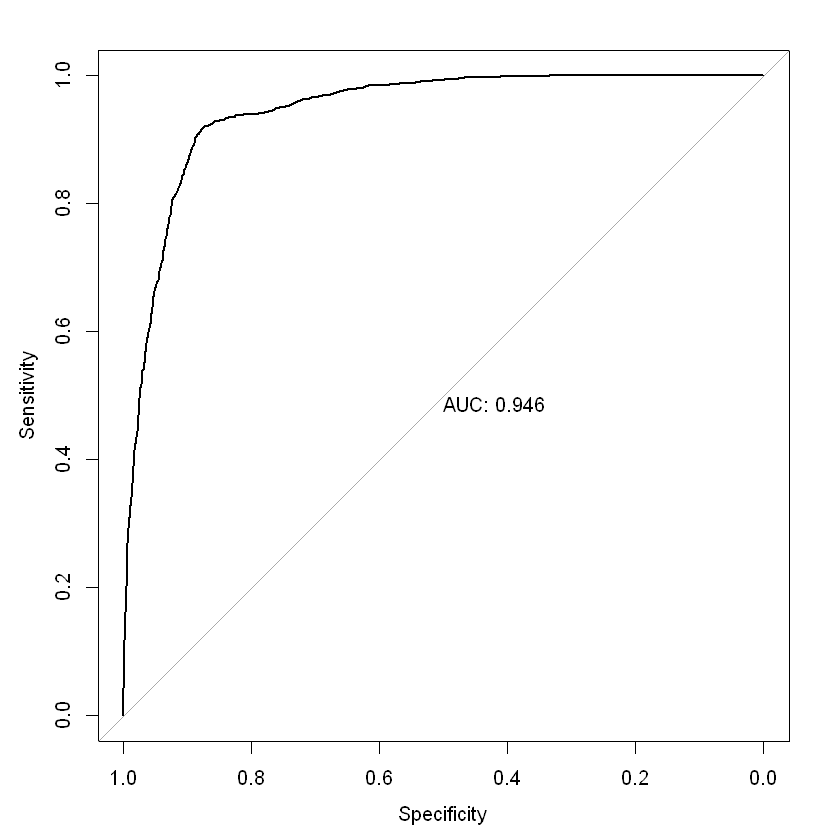

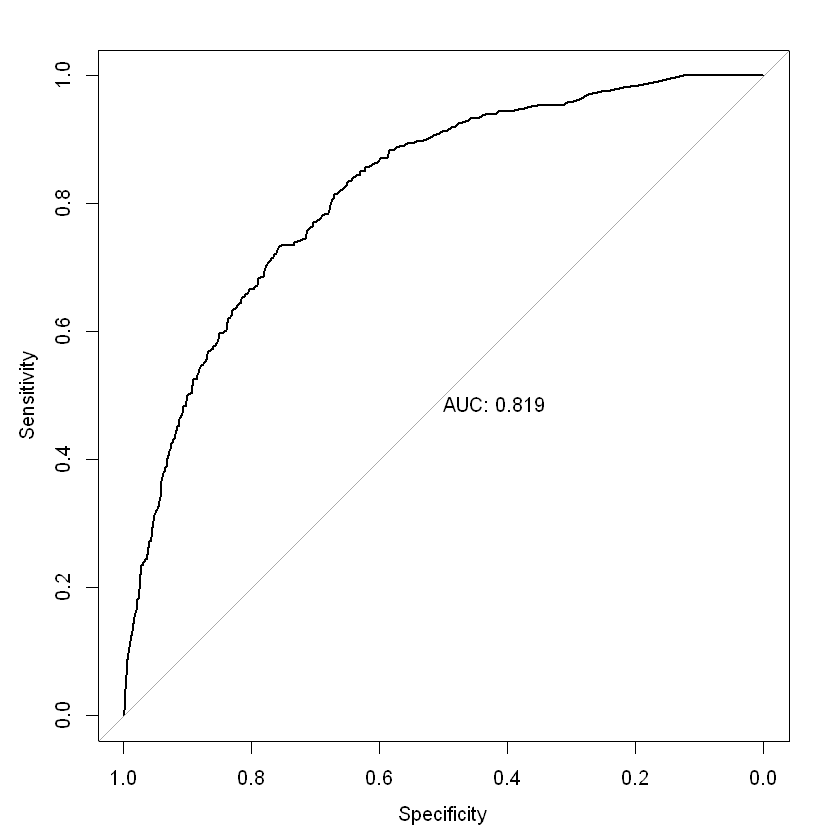

In [70]:
# For the Training Set: 

confusionMatrix(data = trainrf_pred2, reference = traintree$Churn)
trainrf_actual <- ifelse(traintree$Churn == "Yes", 1,0)
roc <- roc(trainrf_actual, trainrf_prob2[,2], plot= TRUE, print.auc=TRUE)


# For the Test Set:

confusionMatrix(data = testrf_pred2, reference = testtree$Churn)
testrf_actual <- ifelse(testtree$Churn == "Yes", 1,0)
roc <- roc(testrf_actual, testrf_prob2[,2], plot = TRUE, print.auc = TRUE)


For the training set, the Accuracy is 0.88 and AUC is 0.95. For the test set, the Accuracy is 0.79 and the AUC is 0.82. 
Compared to the performance of the first model, which Accuracy = 0.97, AUC = 0.995 for the training set, and Accuracy = 0.79,
AUC = 0.82 for the test set. The second model works a little better.

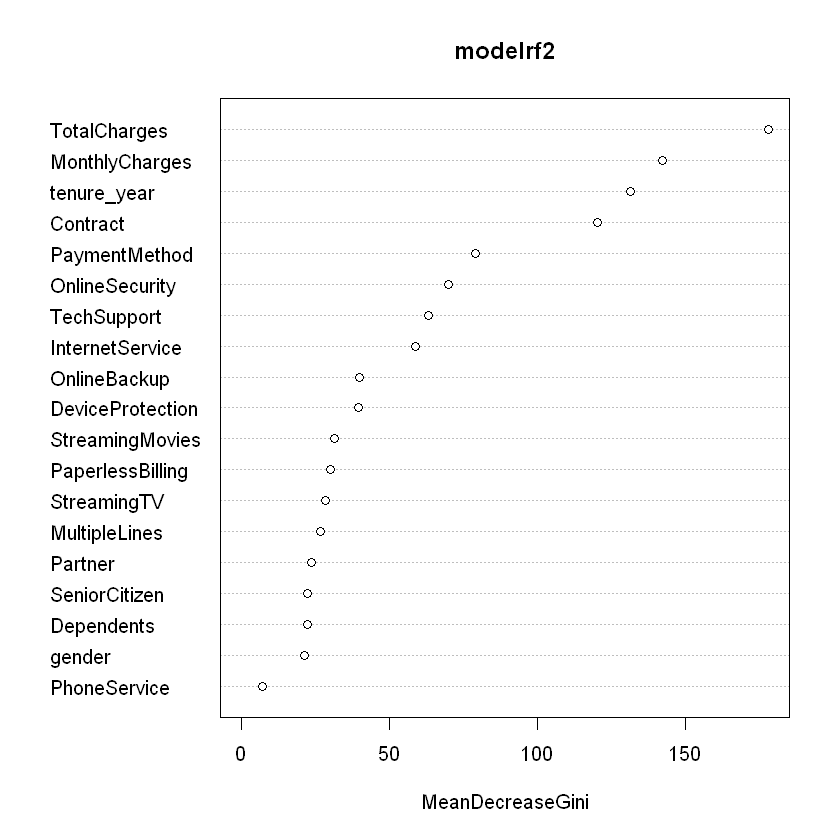

In [71]:
### Variable Importance

varImpPlot(modelrf2,type=2)


### Summary for Random Forest Model
The final random forest model has the Accuracy of 0.79 and AUC of 0.82 for the test set.   
According to the Variable Importance plot, TotalCharges, MonthlyCharges, Tenure_year and Contract are the top 4 most important 
variables to predict churn. The PhoneSerivce, Gender, SeniorCitizen, Dependents, Partner, MultipleLines, PaperlessBilling, StreamingTV,
Movies, DeviceProtection and OnlineBackup have very small effect on Churn.


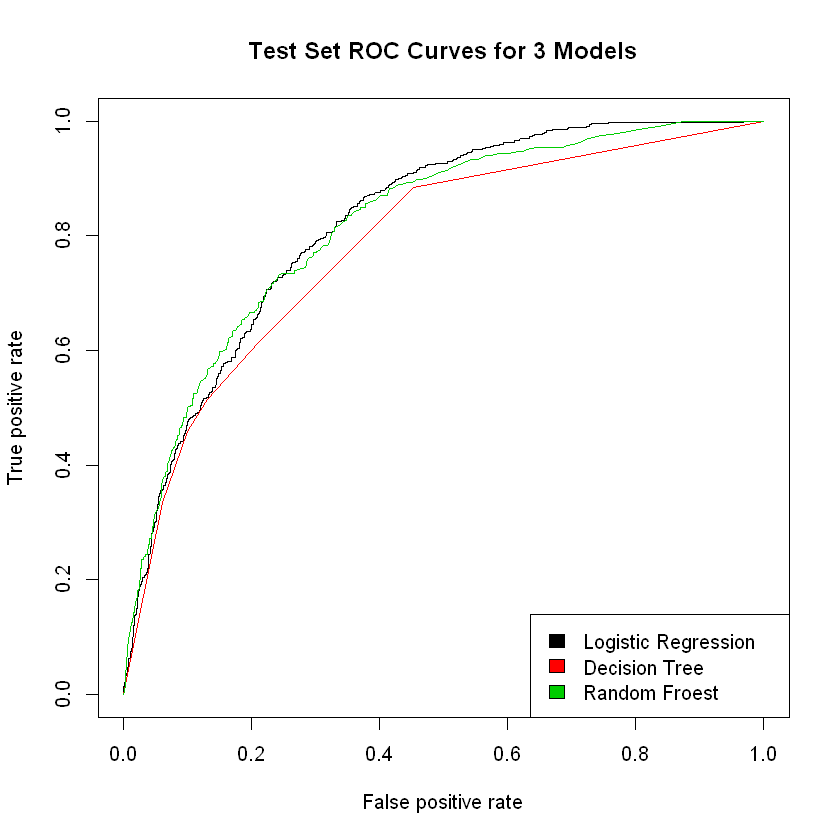

In [73]:
# Comparison of ROC and AUC for Logistic Regression, Decision Tree and Random Forest models

preds_list <- list(test_prob, testtree_prob2[,2], testrf_prob2[,2])
m <- length(preds_list)
actuals_list <- rep(list(testtree$Churn), m)

pred <- prediction(preds_list, actuals_list)
rocs <- performance(pred, "tpr", "fpr")
plot(rocs, col = as.list(1:m), main = "Test Set ROC Curves for 3 Models")
legend(x = "bottomright",
       legend = c("Logistic Regression", "Decision Tree", "Random Froest"),
       fill = 1:m)



The logistic regression model and random forest model work better than the decision tree model. The Accuracies are 0.78 for 
Logistic Regression, 0.78 for Decision Tree and 0.79 for Random Forest, with 0.5 as threshold.

Regarding the variance importance, the logistic regression model and the random forest model have little differences.
They both have MonthlyCharges, tenure, Contract and PaymentMethod as important predictors and have gender, StreamingTV, Movies and 
Partner as unimportant predictors. However, in the logistic regression model, PaperlessBilling, PhoneService and OnlineBackup 
show significant influence on the churn, while in the randomforest model, they have very small predicting power. 